### Linear Regression

This notebook explores linear regression and several regularization methods: ridge regression, lasso regression, and elastic net. The later 3 methods are adding penalty terms to linear regression to prevent overfitting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [ ]:
df = pd.read_csv('/content/student-mat.csv',sep = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
cat_lst = df.select_dtypes(include = 'object').columns
num_lst = [col for col in df.columns if col not in cat_lst]

In [ ]:
cat_dummy = pd.get_dummies(df[cat_lst],drop_first = True)
df = pd.concat([cat_dummy, df[num_lst]], axis = 1)

We want to predict students' second exam grades - including first exam's grades as an explanatory variable, but not using the third exam's grades.

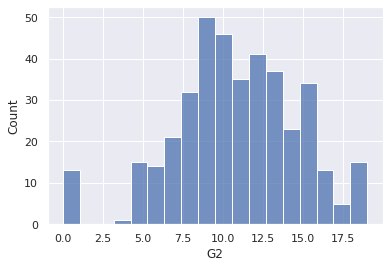

In [ ]:
y = df['G2']
X = df.drop(['G2','G3'], axis = 1)
sns.set_theme()
sns.histplot(y)

The distribution of our target variable is similar to normal. We do not do log-transformation here.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Linear Regression

In [ ]:
lr = LinearRegression()
#lr.fit(X_train, y_train)
print('training cv error: ', cross_val_score(lr, X_train, y_train, cv = 10))

training cv error:  [0.54486441 0.54029511 0.63695348 0.74469897 0.72846347 0.74845341
 0.32655115 0.79806297 0.76953498 0.76128222]


In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

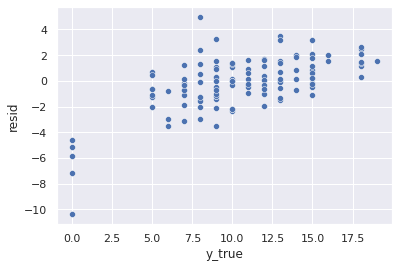

In [ ]:
y_pred = lr.predict(X_test)
resid = y_test - y_pred
eval_df = pd.DataFrame({'resid':resid,'y_true':y_test})
sns.scatterplot(data = eval_df, x = 'y_true', y = 'resid')

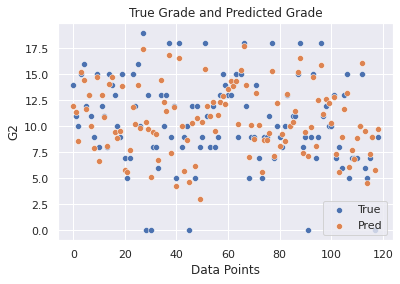

In [ ]:
data_pts = list(range(len(y_test)))
sns.scatterplot(x = data_pts, y = y_test)
sns.scatterplot(x = data_pts, y = y_pred, palette = "YlOrBr")
plt.xlabel('Data Points')
plt.title('True Grade and Predicted Grade')
plt.legend(['True', 'Pred'], loc='lower right')
plt.show()

We see that our linear regression model is not god at predicting very high grades and very low grades. It misses all students who have grades of 0!

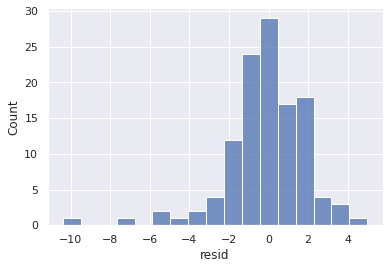

In [ ]:
sns.histplot(data = eval_df, x = 'resid')

In [ ]:
print(f"MSE Linear Regression: {mean_squared_error(y_test, y_pred)} \n")

MSE Linear Regression: 4.3349145580672 



### Ridge Regression, Lasso Regression, Elastic Net

Adding a penalization term to the cost function (mean squared error) helps prevent overfitting. It drives the coefficients of variables towards 0 (and it is based on the coefficient (parameter) you specify for the penalization term, the larger the parameter, the smaller (in absolute terms) the fitted coefficients).

#### Ridge

MSE Ridge Regression: 4.300498095685952 



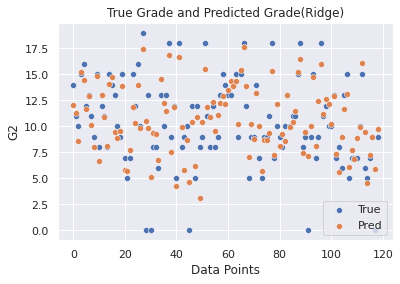

In [ ]:
# Ridge Regression
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X_train, y_train)
y_hat2 = ridge_reg.predict(X_test)

print(f"MSE Ridge Regression: {mean_squared_error(y_test, y_hat2)} \n")

sns.scatterplot(x = data_pts, y = y_test)
sns.scatterplot(x = data_pts, y = y_hat2, palette = "YlOrBr")
plt.xlabel('Data Points')
plt.title('True Grade and Predicted Grade(Ridge)')
plt.legend(['True', 'Pred'], loc='lower right')
plt.show()

#### LASSO

MSE Lasso Regression: 4.170080913295223 



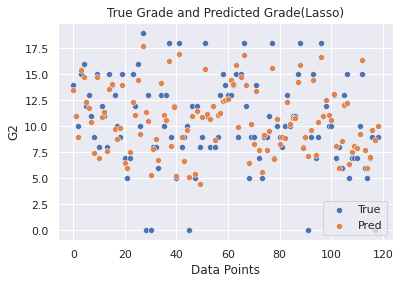

In [ ]:
# LASSO 
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
y_hat3 = lasso_reg.predict(X_test)
print(f"MSE Lasso Regression: {mean_squared_error(y_hat3, y_test)} \n")

sns.scatterplot(x = data_pts, y = y_test)
sns.scatterplot(x = data_pts, y = y_hat3, palette = "YlOrBr")
plt.xlabel('Data Points')
plt.title('True Grade and Predicted Grade(Lasso)')
plt.legend(['True', 'Pred'], loc='lower right')
plt.show()

#### Elastic Net

MSE Lasso Regression: 4.147444352567841 



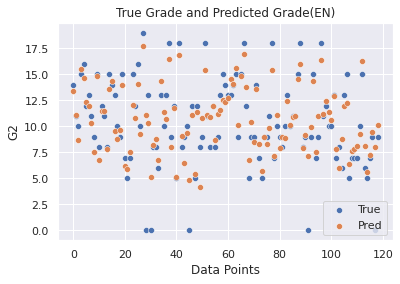

In [ ]:
# Elastic Net
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)
y_hat4 = elastic_net.predict(X_test)
print(f"MSE Lasso Regression: {mean_squared_error(y_hat4, y_test)} \n")

sns.scatterplot(x = data_pts, y = y_test)
sns.scatterplot(x = data_pts, y = y_hat4, palette = "YlOrBr")
plt.xlabel('Data Points')
plt.title('True Grade and Predicted Grade(EN)')
plt.legend(['True', 'Pred'], loc='lower right')
plt.show()

We see that our shrinkage models can improve MSE by a small amount, but they still misses students who have very low and very high grades.